In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
from pathlib import Path
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
try:
    import common
    DATA = common.dataDirectory()
except:
    DATA = '/home/gadamurrr/Desktop/practical-statistics-for-data-scientists/data/'

In [4]:
LOANS_INCOME_CSV = DATA + 'loans_income.csv'
SP500_DATA_CSV = DATA + 'sp500_data.csv.gz'

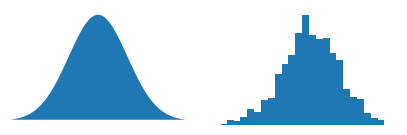

In [7]:
# Фиксирует случайное зерно (seed=1) для воспроизводимости результатов.
# Без этого при каждом запуске генерировались бы разные случайные числа.
np.random.seed(seed=1)

# x: Равномерно распределенные точки на интервале [-3, 3] для построения графика плотности.
# xsample: 1000 значений, сгенерированных из стандартного нормального распределения (среднее=0, стандартное отклонение=1).
x = np.linspace(-3, 3, 300)
xsample = stats.norm.rvs(size=1000)

# Создает фигуру с двумя горизонтальными subplots (ширина=5 дюймов, высота=1.5 дюйма).
fig, axes = plt.subplots(ncols=2, figsize=(5, 1.5))

# Рисует теоретическую плотность нормального распределения (stats.norm.pdf(x)).
# fill() закрашивает область под кривой.
# Оси скрыты для минималистичного отображения.
ax = axes[0]
ax.fill(x, stats.norm.pdf(x))
ax.set_axis_off()
ax.set_xlim(-3, 3)


# Строит гистограмму случайных значений xsample.
# bins=30 — число столбцов гистограммы.
# Оси также скрыты, а диапазон x совпадает с левым графиком для сравнения.
ax = axes[1]
ax.hist(xsample, bins=30)
ax.set_axis_off()
ax.set_xlim(-3, 3)
ax.set_position

plt.show()

#  Выборочное распределение статистики

In [9]:
loans_income = pd.read_csv(LOANS_INCOME_CSV)
loans_income

,x
0,67000
1,52000
2,100000
3,78762
4,37041
...,...
49995,40000
49996,54000
49997,50000
49998,82000


In [10]:
loans_income = loans_income.squeeze("columns")
loans_income

0         67000
1         52000
2        100000
3         78762
4         37041
          ...  
49995     40000
49996     54000
49997     50000
49998     82000
49999     70000
Name: x, Length: 50000, dtype: int64

In [11]:
sample_data = pd.DataFrame({
    "income": loans_income.sample(1000),
    "type": "Data",
})

sample_data

,income,type
40292,63000,Data
38959,92000,Data
17361,134000,Data
33996,52000,Data
26491,43000,Data
...,...,...
31345,110000,Data
12399,60000,Data
15,36000,Data
9943,48000,Data


In [12]:
sample_data_05 = pd.DataFrame({
    "income": [loans_income.sample(5).mean() for _ in range(1000)],
    "type": "Mean of 5",
})

sample_data_05

,income,type
0,83700.0,Mean of 5
1,56200.0,Mean of 5
2,45000.0,Mean of 5
3,73000.0,Mean of 5
4,65200.0,Mean of 5
...,...,...
995,66161.0,Mean of 5
996,68939.8,Mean of 5
997,50400.0,Mean of 5
998,50400.0,Mean of 5


In [13]:
sample_data_20 = pd.DataFrame({
    "income": [loans_income.sample(20).mean() for _ in range(1000)],
    "type": "Mean of 20",
})

sample_data_20

,income,type
0,81372.55,Mean of 20
1,60432.05,Mean of 20
2,69336.60,Mean of 20
3,72635.50,Mean of 20
4,69729.80,Mean of 20
...,...,...
995,70262.50,Mean of 20
996,75054.00,Mean of 20
997,79831.55,Mean of 20
998,69985.40,Mean of 20


In [14]:
results = pd.concat([sample_data, sample_data_05, sample_data_20])
results

,income,type
40292,63000.00,Data
38959,92000.00,Data
17361,134000.00,Data
33996,52000.00,Data
26491,43000.00,Data
...,...,...
995,70262.50,Mean of 20
996,75054.00,Mean of 20
997,79831.55,Mean of 20
998,69985.40,Mean of 20


# Гистограмма годовых доходов 1000 ссудозаявителей (1)
# затем 1000 средних с числом заявителей 5 (2)
# и 20 (3)

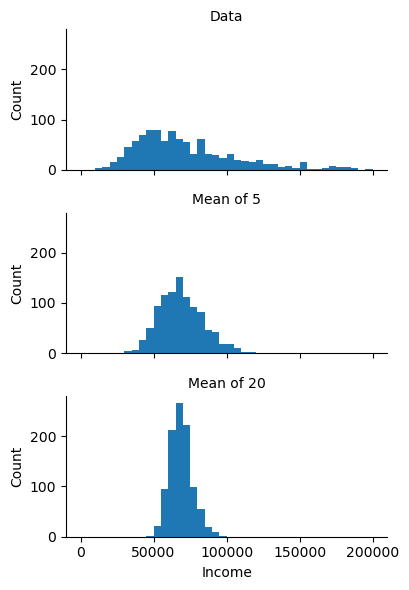

In [15]:
g = sns.FacetGrid(results, col="type", col_wrap=1, height=2, aspect=2)
g.map(plt.hist, "income", range=[0, 200000], bins=40)
g.set_axis_labels("Income", "Count")
g.set_titles("{col_name}")

plt.show()

# Бутстрап

алгоритм бутстрапа
1. извлечь выборочное значение, записать его и вернуть назад
2. повторить n раз
3. записать среднее для n повторно отобранных значений
4. повторить шаги 1-3 R раз
5. использовать R результатов, чтобы вычислить их std

In [18]:
results = []

for nrepaeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)

print("Статистика бутстрапа")
print(f"исходно: {loans_income.median()}")
print(f"смещение: {results.mean() - loans_income.median()}")
print(f"станд.ошибка: {results.std()}")

Статистика бутстрапа
исходно: 62000.0
смещение: -87.46349999999802
станд.ошибка: 227.51910548591607


# Доверительные интервалы

68760.51844
55734.1


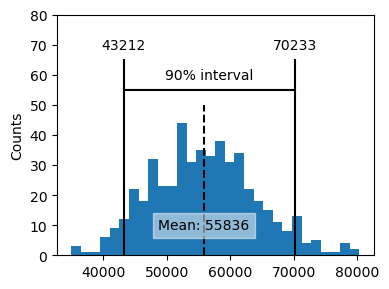

In [19]:
print(loans_income.mean())
np.random.seed(seed=3)  

# создать выборку из 20 данных о доходах по кредитам
sample20 = resample(loans_income, n_samples=20, replace=False)
print(sample20.mean())

results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [55, 55], color='black')
for x in confidence_interval:
    ax.plot([x, x], [0, 65], color='black')
    ax.text(x, 70, f'{x:.0f}', 
            horizontalalignment='center', verticalalignment='center')
ax.text(sum(confidence_interval) / 2, 60, '90% interval',
        horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 10, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_ylabel('Counts')

plt.tight_layout()
plt.show()

In [20]:
np.random.seed(seed=3)
# create a sample of 20 loan income data
sample20 = resample(loans_income, n_samples=20, replace=False)

results = []
for nrepeat in range(500):
    sample = resample(sample20)
    results.append(sample.mean())
results = pd.Series(results)

confidence_interval = list(results.quantile([0.05, 0.95]))
ax = results.plot.hist(bins=30, figsize=(4, 3), color='C1')
ax.plot(confidence_interval, [55, 55], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 60], color='black')
ax.text(82000, 50, 
        f'90% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')

confidence_interval = list(results.quantile([0.025, 0.975]))
ax = results.plot.hist(bins=30, figsize=(4, 3))
ax.plot(confidence_interval, [65, 65], color='black', linestyle='--')
for x in confidence_interval:
    ax.plot([x, x], [0, 70], color='black')
ax.text(82000, 65, 
        f'95% CI\n[{confidence_interval[0]:.0f}, {confidence_interval[1]:.0f}]',
       fontsize='small')
# ax.text(sum(confidence_interval) / 2, 264, '95 % interval',
#         horizontalalignment='center', verticalalignment='center')

meanIncome = results.mean()
ax.plot([meanIncome, meanIncome], [0, 50], color='black', linestyle='--')
ax.text(meanIncome, 5, f'Mean: {meanIncome:.0f}',
        bbox=dict(facecolor='white', edgecolor='white', alpha=0.5),
        horizontalalignment='center', verticalalignment='center')
ax.set_ylim(0, 80)
ax.set_xlim(37000, 102000)
ax.set_xticks([40000, 50000, 60000, 70000, 80000])
ax.set_ylabel('Counts')

# plt.tight_layout()
# plt.show()

Text(0, 0.5, 'Counts')

# Нормальное распределение

Стандартное нормальное распределение и квантиль-квантильные графики

В пакете _scipy_ есть функция (`scipy.stats.probplot`) для создания QQ-графиков. Аргумент `dist` указывает распределение, которое по умолчанию установлено на нормальное распределение.

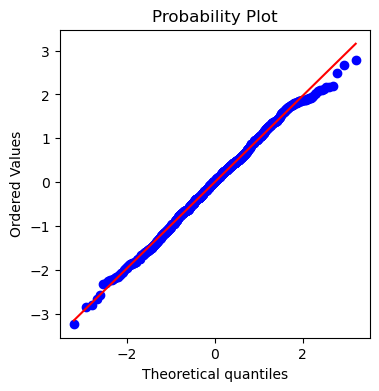

In [22]:
fig, ax = plt.subplots(figsize=(4, 4))

norm_sample = stats.norm.rvs(size=1000)
stats.probplot(norm_sample, plot=ax)

plt.show()

# Длиннохвостое распределение

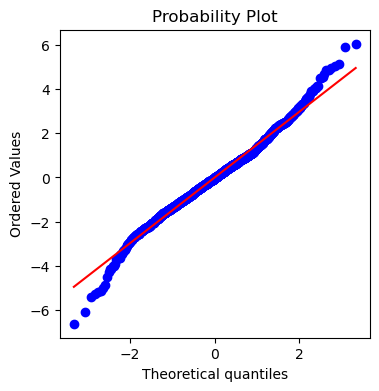

In [23]:
sp500_px = pd.read_csv(SP500_DATA_CSV)

nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx > 0]))

fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)

plt.show()

# Биноминальное распределение

In [24]:
stats.binom.pmf(2, n=5, p=0.1)

0.07289999999999992

In [25]:
stats.binom.cdf(2, n=5, p=0.1)

0.99144

# Распредление Пуассона

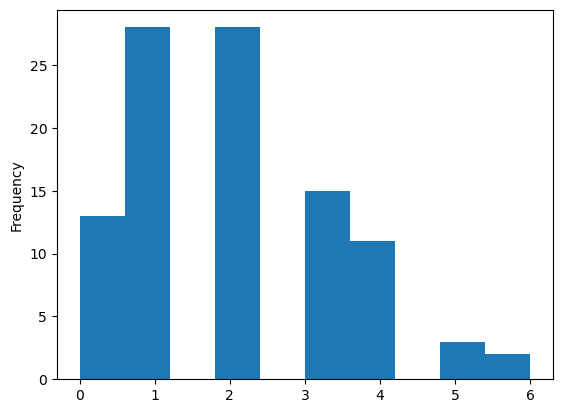

In [26]:
sample = stats.poisson.rvs(2, size=100)

pd.Series(sample).plot.hist()
plt.show()

# Экспоненциальное распределение

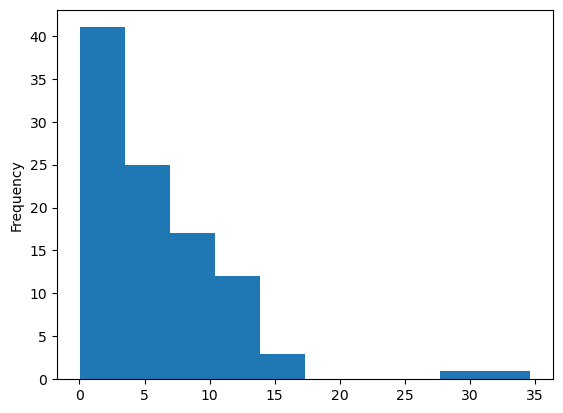

In [29]:
sample = stats.expon.rvs(scale=5, size=100)

pd.Series(sample).plot.hist()
plt.show()

# Распределение Вейбулла

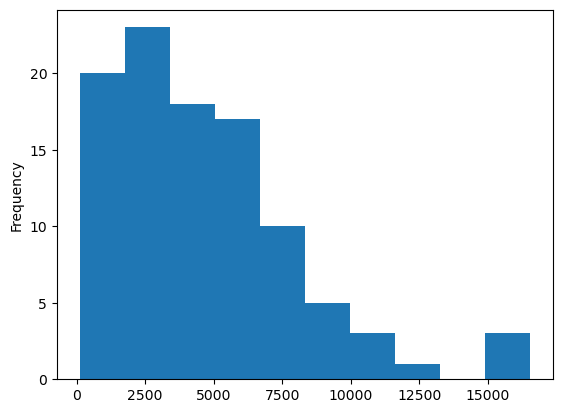

In [31]:
sample = stats.weibull_min.rvs(1.5, scale=5000, size=100)

pd.Series(sample).plot.hist()
plt.show()